# Lab 2


In [24]:
# look at foo3 and foo4
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import csv
from scipy.stats import norm
import seaborn as sns


# create a function to edit csv file to add a new top row to the csv file. 
# Also make sure that top row is already there to not add it again
def add_top_row(file_name):
    top_row = "Col1,Col2,Col3,Time,Voltage,Col6"
    with open(file_name, 'r') as f:
        lines = f.readlines()
        if lines[0].strip() != top_row:
            lines.insert(0, top_row + '\n')
    with open(file_name, 'w') as f:
        f.writelines(lines)


# --------------------------------------------------------------------

# 1 A

In [28]:
# add top row to the csv file
add_top_row("./data/1a/1aData.csv")
# Convert an example LVM file to CSV
data_1a = pd.read_csv('./data/1a/1aData.csv')

              Col1                Col2  Col3     Time  Voltage  Col6
0    Record Length        2.500000e+03   NaN -0.01250    -11.0   NaN
1  Sample Interval        1.000000e-05   NaN -0.01249    -11.0   NaN
2    Trigger Point  1.250000000000e+03   NaN -0.01248    -11.0   NaN
3              NaN                 NaN   NaN -0.01247    -11.0   NaN
4              NaN                 NaN   NaN -0.01246    -11.0   NaN


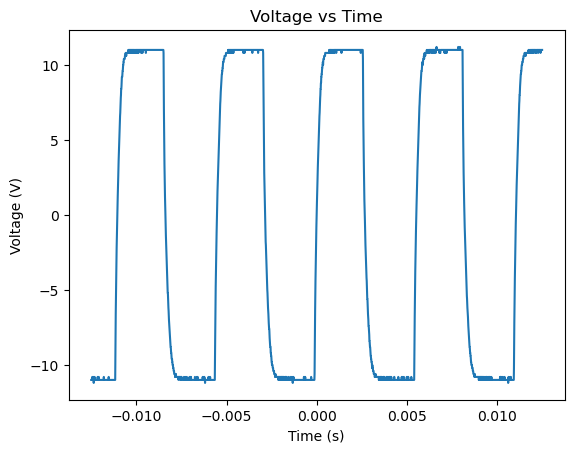

In [29]:
# Verify the column names in the dataframe
print(data_1a.head())

# Assuming the correct column names are 'Col4' and 'Col5'
plt.plot(data_1a['Time'], data_1a['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.show()

# 1B 

In [31]:
add_top_row("./data/1b2khz/F0001CH1.csv")
add_top_row("./data/1b2khz/F0001CH2.csv")

add_top_row("./data/1b20khz/F0002CH1.csv")
add_top_row("./data/1b20khz/F0002CH2.csv")

add_top_row("./data/1b200hz/F0000CH1.csv")
add_top_row("./data/1b200hz/F0000CH2.csv")

add_top_row("./data/1b200khz/F0003CH1.csv")
add_top_row("./data/1b200khz/F0003CH2.csv")

data_1b_ch1= pd.read_csv('./data/1b2khz/F0001CH1.csv')
data_1b_ch2= pd.read_csv('./data/1b2khz/F0001CH2.csv')

data_1b_ch1_20khz= pd.read_csv('./data/1b20khz/F0002CH1.csv')
data_1b_ch2_20khz= pd.read_csv('./data/1b20khz/F0002CH2.csv')

data_1b_ch1_200hz= pd.read_csv('./data/1b200hz/F0000CH1.csv')
data_1b_ch2_200hz= pd.read_csv('./data/1b200hz/F0000CH2.csv')

data_1b_ch1_200khz= pd.read_csv('./data/1b200khz/F0003CH1.csv')
data_1b_ch2_200khz= pd.read_csv('./data/1b200khz/F0003CH2.csv')


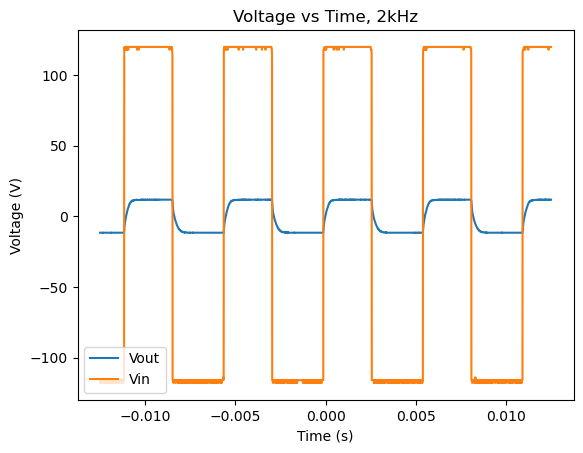

In [68]:
# graph  data_1b_ch1 and data_1b_ch2, overlaying each other. 
# Add index of channels to the legend
plt.plot(data_1b_ch1['Time'], data_1b_ch1['Voltage'])
plt.plot(data_1b_ch2['Time'], data_1b_ch2['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 2kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


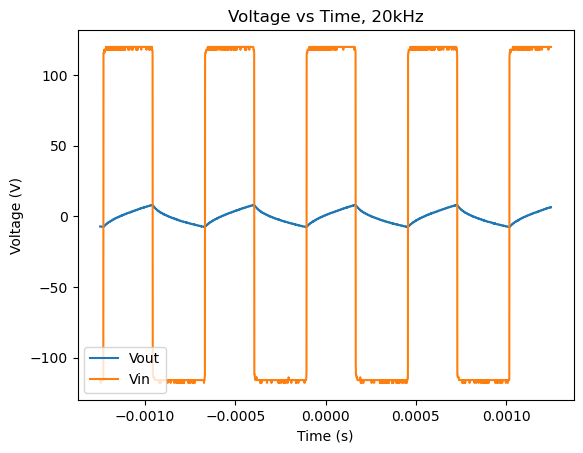

In [70]:
# graph data_1b_ch1_20khz and data_1b_ch2_20khz, overlaying each other.
# Add index of channels to the legend
plt.plot(data_1b_ch1_20khz['Time'], data_1b_ch1_20khz['Voltage'])
plt.plot(data_1b_ch2_20khz['Time'], data_1b_ch2_20khz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 20kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


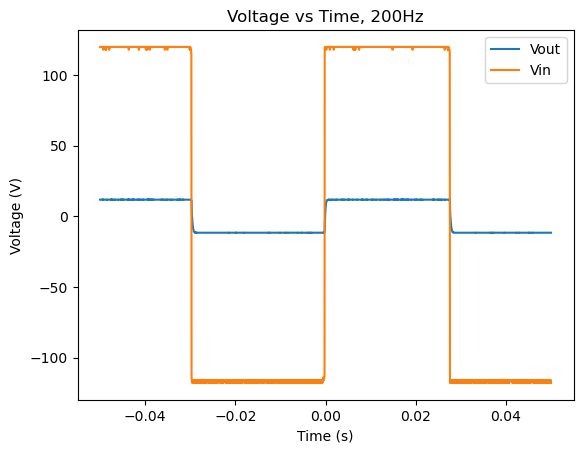

In [76]:
# graph data_1b_ch1_200hz and data_1b_ch2_200hz, overlaying each other.
# Add index of channels to the legend
plt.plot(data_1b_ch1_200hz['Time'], data_1b_ch1_200hz['Voltage'])
plt.plot(data_1b_ch2_200hz['Time'], data_1b_ch2_200hz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 200Hz')
plt.legend(['Vout', 'Vin'])
plt.show()

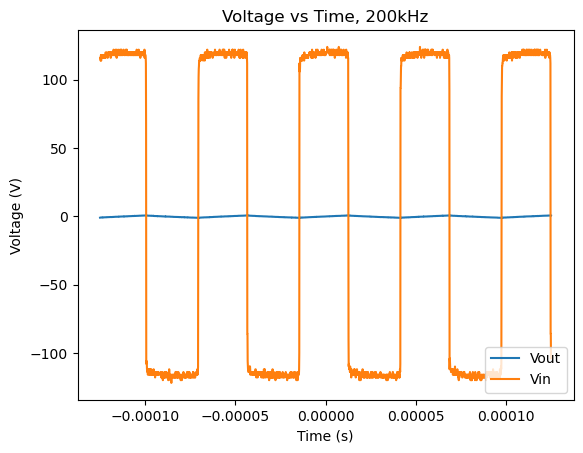

In [79]:
# graph data_1b_ch1_200khz and data_1b_ch2_200khz, overlaying each other.
# Add index of channels to the legend
plt.plot(data_1b_ch1_200khz['Time'], data_1b_ch1_200khz['Voltage'])
plt.plot(data_1b_ch2_200khz['Time'], data_1b_ch2_200khz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 200kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


# 1C

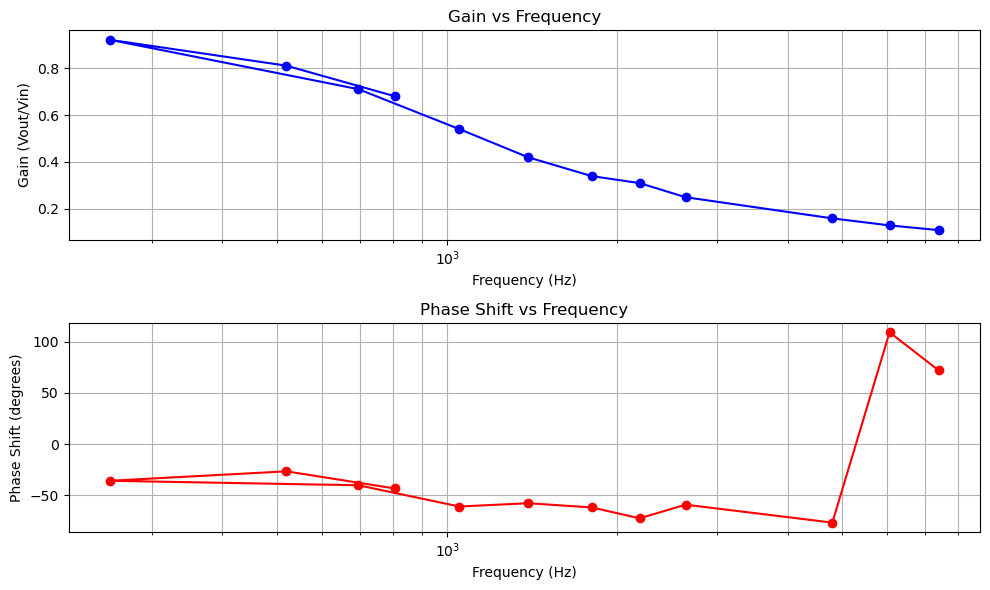

In [65]:
# Question 1 C

# Data from the table
frequency = [807, 519, 253, 696, 1050, 1390, 1800, 2190, 2640, 4800, 6060, 7400]  # in Hz
gain = [0.68, 0.81, 0.92, 0.71, 0.54, 0.42, 0.34, 0.31, 0.25, 0.16, 0.13, 0.11]  # Vout/Vin
phase_shift = [-43.2, -26.5, -35.7, -40.1, -60.8, -57.6, -61.7, -72.3, -59.0, -76.5, 109.0, 72.0]  # in degrees

# Plot 1: Gain vs Frequency
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequency, gain, marker='o', color='blue')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Vout/Vin)')
plt.title('Gain vs Frequency')
plt.grid(True, which="both")

# Plot 2: Phase Shift vs Frequency
plt.subplot(2, 1, 2)
plt.plot(frequency, phase_shift, marker='o', color='red')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Phase Shift vs Frequency')
plt.grid(True, which="both")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# 2 A

In [66]:
# add top row and load data
add_top_row("./data/2a/F0000CH1.csv")
data_2a = pd.read_csv('./data/2a/F0000CH1.csv')

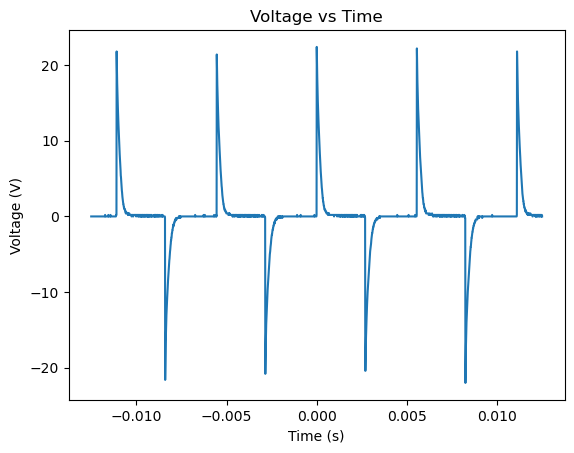

In [42]:
# graph data_2a
plt.plot(data_2a['Time'], data_2a['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time')
plt.show()


# 2B


In [59]:
# add top row and load data
add_top_row("./data/2b2khz/F0001CH1.csv")
add_top_row("./data/2b2khz/F0001CH2.csv")

add_top_row("./data/2b20khz/F0002CH1.csv")
add_top_row("./data/2b20khz/F0002CH2.csv")

add_top_row("./data/2b200hz/F0000CH1.csv")
add_top_row("./data/2b200hz/F0000CH2.csv")

add_top_row("./data/2b200khz/F0003CH1.csv")
add_top_row("./data/2b200khz/F0003CH2.csv")

data_2b_ch1= pd.read_csv('./data/2b2khz/F0001CH1.csv')
data_2b_ch2= pd.read_csv('./data/2b2khz/F0001CH2.csv')

data_2b_ch1_20khz= pd.read_csv('./data/2b20khz/F0002CH1.csv')
data_2b_ch2_20khz= pd.read_csv('./data/2b20khz/F0002CH2.csv')

data_2b_ch1_200hz= pd.read_csv('./data/2b200hz/F0000CH1.csv')
data_2b_ch2_200hz= pd.read_csv('./data/2b200hz/F0000CH2.csv')

data_2b_ch1_200khz= pd.read_csv('./data/2b200khz/F0003CH1.csv')
data_2b_ch2_200khz= pd.read_csv('./data/2b200khz/F0003CH2.csv')

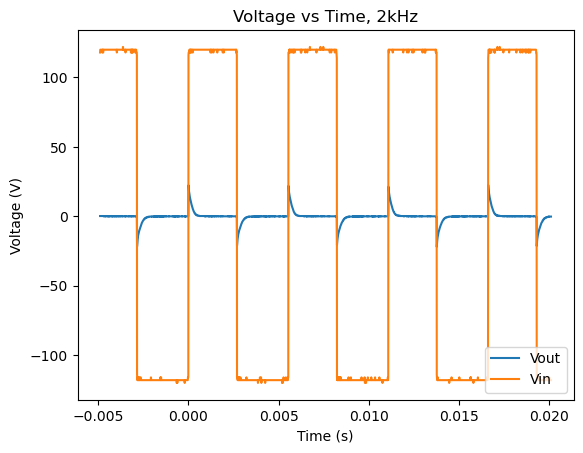

In [80]:
# graph data_2b_ch1 and data_2b_ch2, overlaying each other.
# Add index of channels to the legend
plt.plot(data_2b_ch1['Time'], data_2b_ch1['Voltage'])
plt.plot(data_2b_ch2['Time'], data_2b_ch2['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 2kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


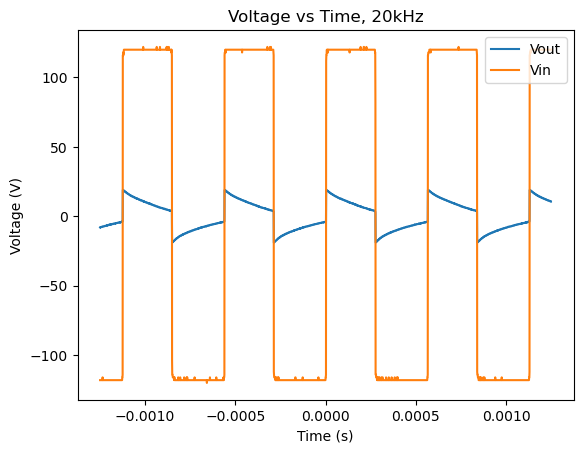

In [75]:
# graph data_2b_ch1_20khz and data_2b_ch2_20khz, overlaying each other.
# Add index of channels to the legend

plt.plot(data_2b_ch1_20khz['Time'], data_2b_ch1_20khz['Voltage'])
plt.plot(data_2b_ch2_20khz['Time'], data_2b_ch2_20khz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 20kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


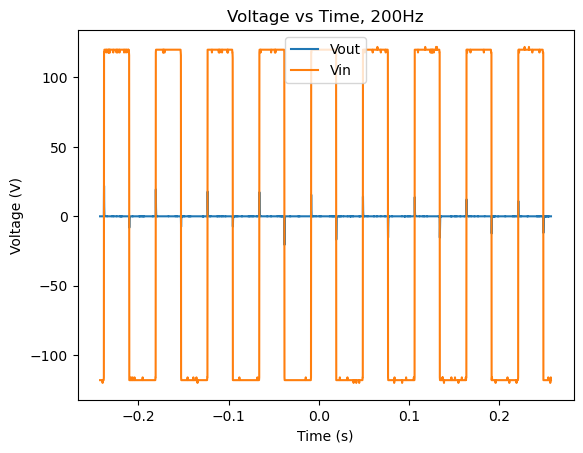

In [81]:
# graph data_2b_ch1_200hz and data_2b_ch2_200hz, overlaying each other.
# Add index of channels to the legend
plt.plot(data_2b_ch1_200hz['Time'], data_2b_ch1_200hz['Voltage'])
plt.plot(data_2b_ch2_200hz['Time'], data_2b_ch2_200hz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 200Hz')
plt.legend(['Vout', 'Vin'])
plt.show()


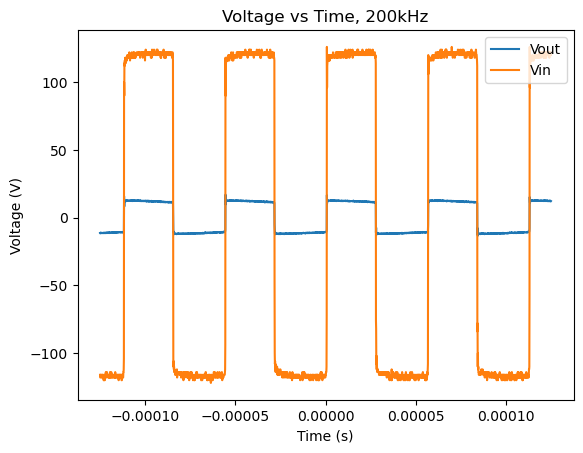

In [82]:
# graph data_2b_ch1_200khz and data_2b_ch2_200khz, overlaying each other.
# Add index of channels to the legend
plt.plot(data_2b_ch1_200khz['Time'], data_2b_ch1_200khz['Voltage'])
plt.plot(data_2b_ch2_200khz['Time'], data_2b_ch2_200khz['Voltage'])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Time, 200kHz')
plt.legend(['Vout', 'Vin'])
plt.show()


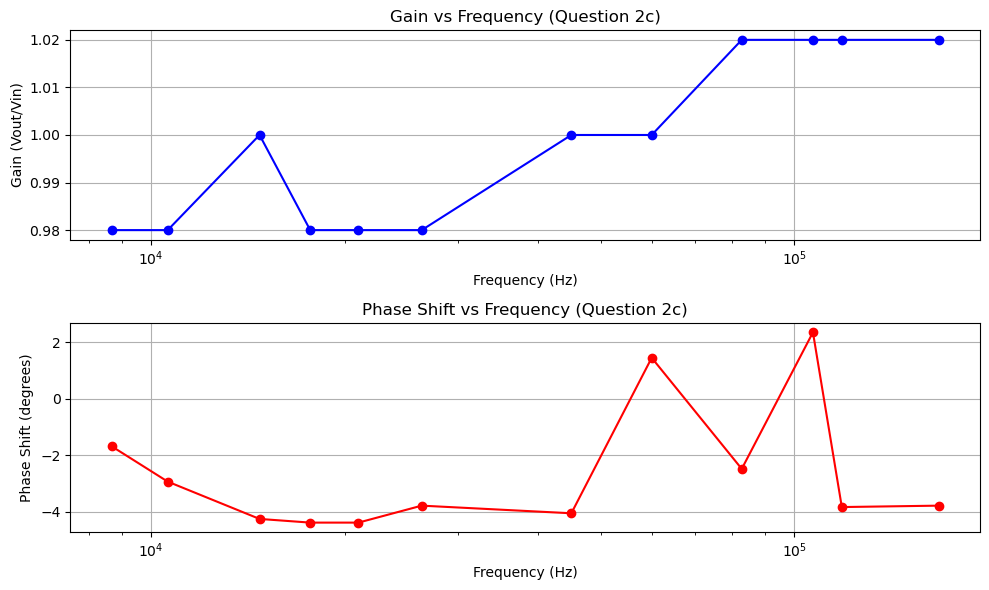

In [67]:
# Graphs for 2c
# Create graph of Gain (Vin/Vout) and phase shift as a function of frequency

import matplotlib.pyplot as plt

# Data from the table
frequency = [167.59e3, 118.5e3, 106.86e3, 82.82e3, 60e3, 45e3, 26.34e3, 21e3, 17.67e3, 14.74e3, 10.61e3, 8.68e3]  # in Hz
gain = [1.02, 1.02, 1.02, 1.02, 1.0, 1.0, 0.98, 0.98, 0.98, 1.0, 0.98, 0.98]  # Vout/Vin
phase_shift = [-3.78, -3.83, 2.35, -2.48, 1.45, -4.05, -3.78, -4.38, -4.38, -4.25, -2.93, -1.68]  # in degrees

# Plot 1: Gain vs Frequency
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequency, gain, marker='o', color='blue')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Vout/Vin)')
plt.title('Gain vs Frequency (Question 2c)')
plt.grid(True)

# Plot 2: Phase Shift vs Frequency
plt.subplot(2, 1, 2)
plt.plot(frequency, phase_shift, marker='o', color='red')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Phase Shift vs Frequency (Question 2c)')
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


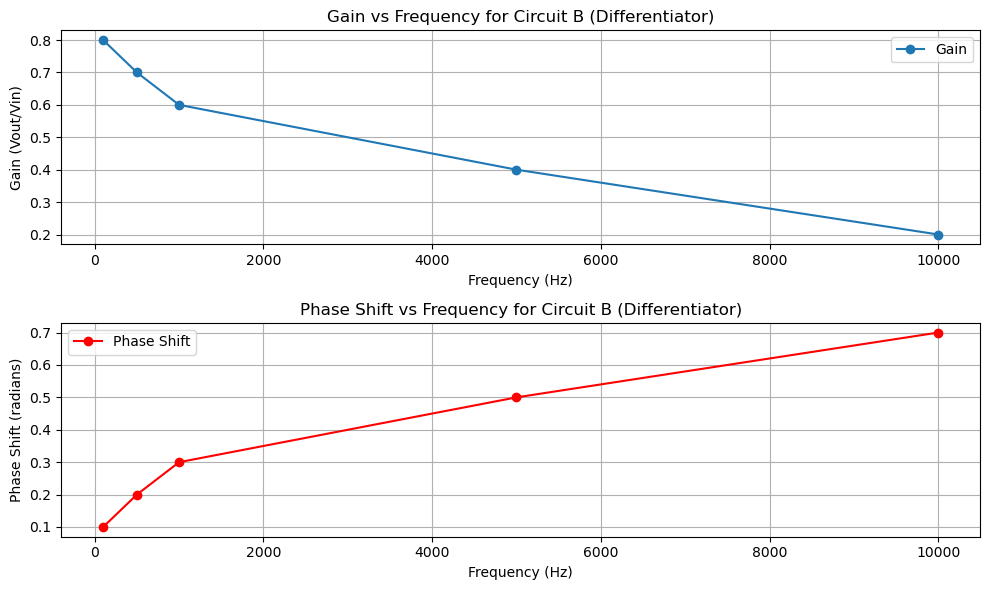

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency (Hz)
frequency = np.array([100, 500, 1000, 5000, 10000])

# Gain (Vout/Vin)
gain = np.array([0.8, 0.7, 0.6, 0.4, 0.2])

# Phase Shift (radians)
phase_shift = np.array([0.1, 0.2, 0.3, 0.5, 0.7])

# Plot 1: Gain vs Frequency
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(frequency, gain, marker='o', label='Gain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Vout/Vin)')
plt.title('Gain vs Frequency for Circuit B (Differentiator)')
plt.grid(True)
plt.legend()

# Plot 2: Phase Shift vs Frequency
plt.subplot(2, 1, 2)
plt.plot(frequency, phase_shift, 'ro-', label='Phase Shift')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Shift (radians)')
plt.title('Phase Shift vs Frequency for Circuit B (Differentiator)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
